### Importing data

In [20]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
df = pd.read_csv('industrial_fault_detection_data_1000.csv')

In [6]:
df.head()

,Timestamp,Vibration (mm/s),Temperature (°C),Pressure (bar),RMS Vibration,Mean Temp,Fault Label
0,2023-03-10 00:00:00,0.437086,64.810634,7.785117,0.601657,90.561384,1
1,2023-03-10 00:01:00,0.955643,93.352076,7.740936,0.601657,90.561384,1
2,2023-03-10 00:02:00,0.758795,119.835667,9.718764,0.601657,90.561384,0
3,2023-03-10 00:03:00,0.638793,108.577991,7.748639,0.601657,90.561384,1
4,2023-03-10 00:04:00,0.240417,114.524892,7.815849,0.601657,90.561384,0


In [13]:
df['RMS Vibration'].value_counts()
df['Mean Temp'].value_counts()

Mean Temp
90.561384    1000
Name: count, dtype: int64

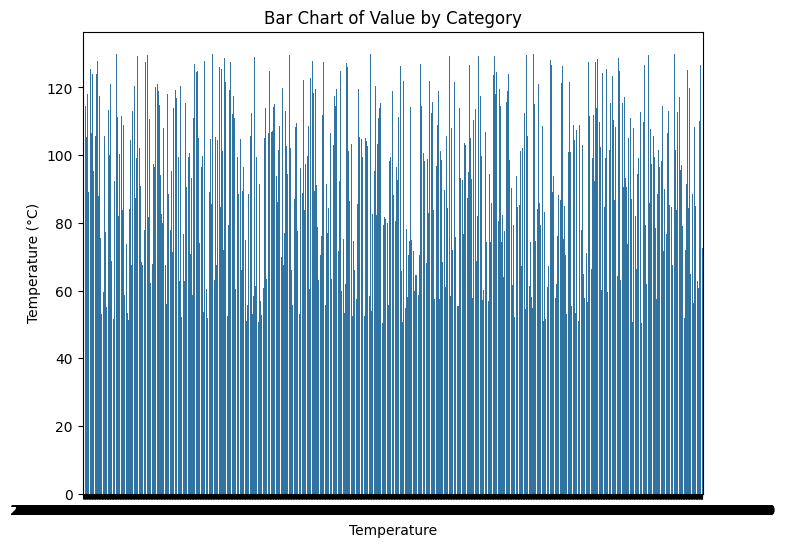

In [10]:
#Temperature

plt.figure(figsize=(8, 6))
sns.barplot(x='Timestamp', y='Temperature (°C)', data=df)
plt.title('Bar Chart of Value by Category')
plt.xlabel('Temperature')
plt.show()

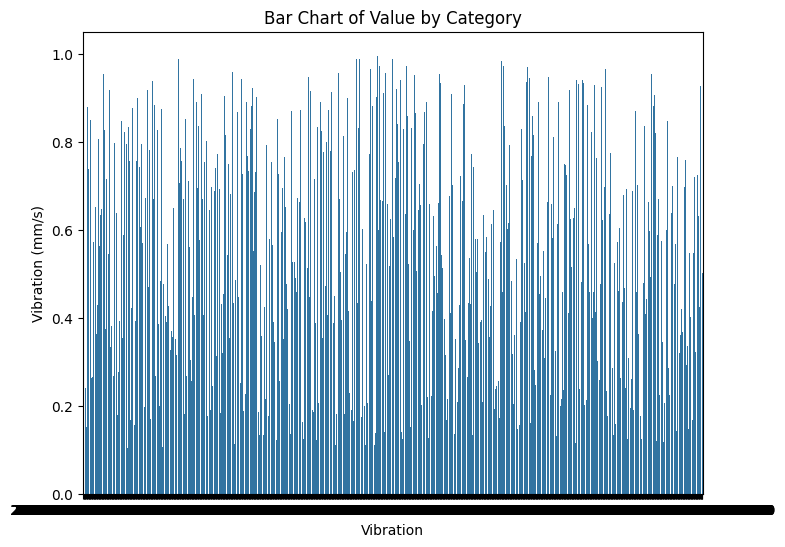

In [11]:
#Vibration

plt.figure(figsize=(8, 6))
sns.barplot(x='Timestamp', y='Vibration (mm/s)', data=df)
plt.title('Bar Chart of Value by Category')
plt.xlabel('Vibration')
plt.show()

### Fitting of data

In [23]:
X = df[['Vibration (mm/s)','Temperature (°C)', 'Pressure (bar)']]
y = df['Fault Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
input_shape = X_train.shape

### CNN Testing

In [ ]:
model = keras.models.Sequential()

# Add a 2D Convolution layer (1x3 kernel, 1 channel in, 32 channels out)
model.add(layers.Conv2D(32, (1, 3), activation='relu', input_shape=(1, 3, 1)))
model.add(layers.MaxPooling2D((1, 2)))  # Max pooling (downsampling)

# Add another convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((1, 2)))  # Max pooling (downsampling)

# Flatten the output from the convolution layers to feed into a fully connected layer
model.add(layers.Flatten())

# Add a fully connected (dense) layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with sigmoid activation (for binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 0, 64)`, `kernel shape=(3, 3, 64, 128)`, `dilation_rate=[1 1]`.